# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [31]:
# Load pickled data
import pickle

# Fill this in based on where you saved the training and testing data
training_file = './resources/traffic-signs-data/train.p'
testing_file = './resources/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [32]:
### Replace each question mark with the appropriate value.

# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

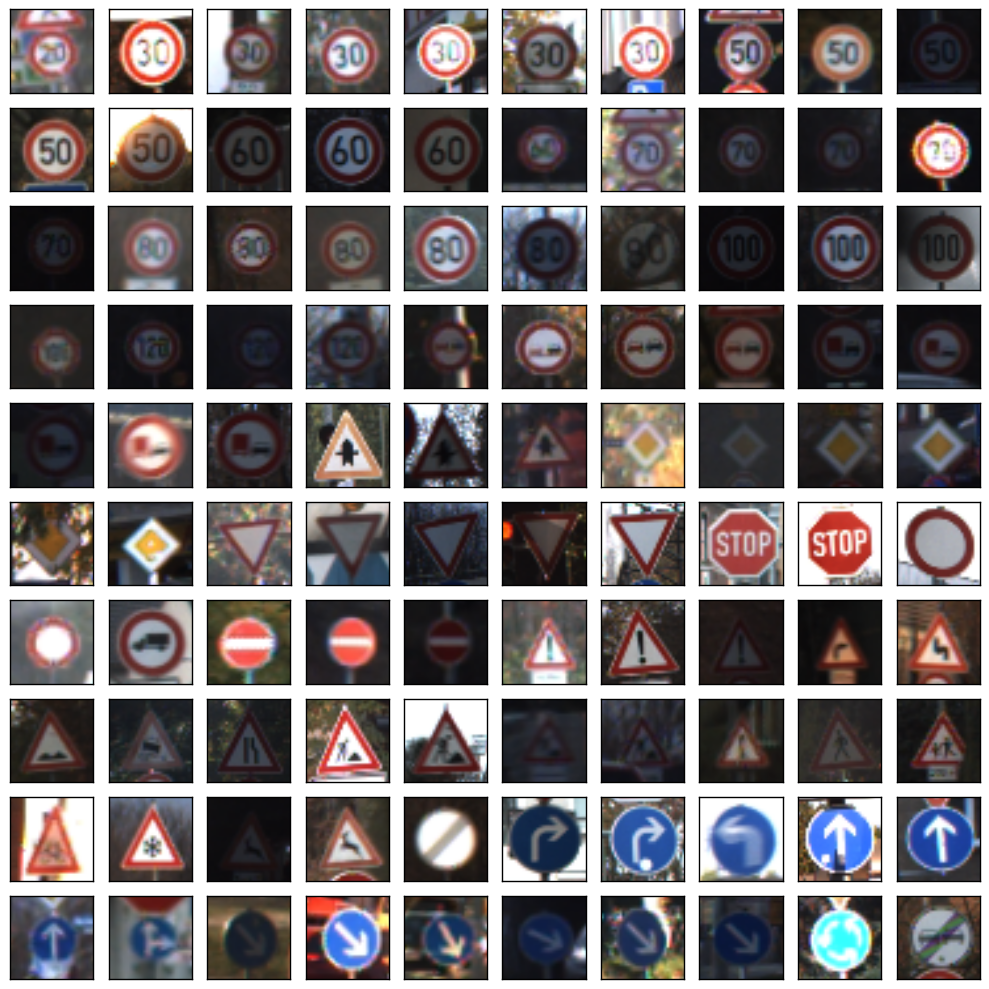

In [33]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import os
from sklearn.model_selection import train_test_split
data_dump = 'allData.pickle'
data_already_generated = os.path.isfile(data_dump)

def visualize(data, grid_size=10, stride=None, colormap = None):
    # prepare a grid that visualizes images
    if not stride:
        stride = int(data.shape[0]/(grid_size**2))
    fig = plt.figure(figsize=(grid_size,grid_size))
    for i in range(grid_size**2):
        if not i < len(data):
            break
        subplot = plt.subplot(grid_size, grid_size, i+1)
        subplot.set_xticks(())
        subplot.set_yticks(())
        img = data[i*stride]
        if colormap == "gray":
            img = img.squeeze()
        subplot.imshow(img, cmap = colormap)
        
    fig.tight_layout()
        
visualize(X_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

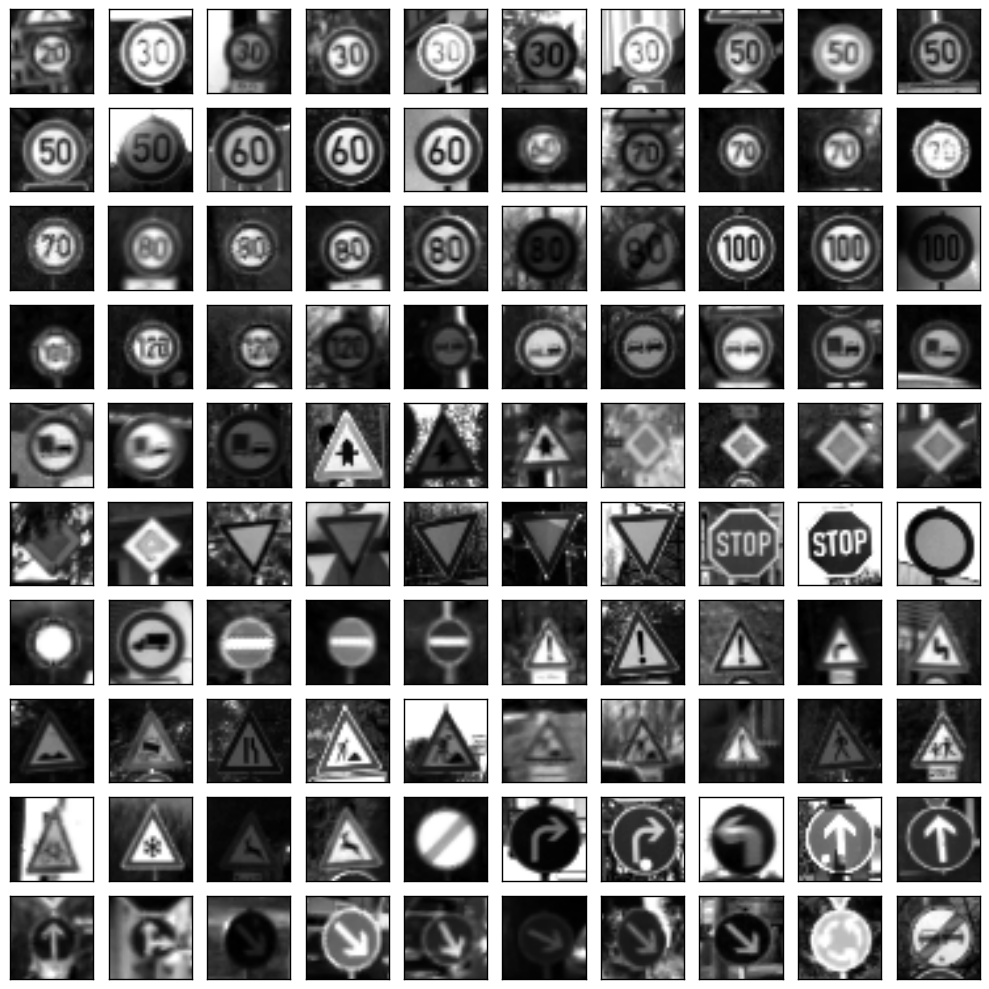

In [34]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import numpy as np
import cv2

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def normalize(img):
    a = 0.1
    b = 0.9
    min_value = np.min(img)
    max_value = np.max(img)
    return a + ((img-min_value)*(b-a))/(max_value-min_value)

def preprocess(images):
    # turn each image into grayscale, then normalize it, then change most inner
    # dimension because it was squeezed by cv2.cvtColor function
    new_images = np.zeros((images.shape[0],images.shape[1],images.shape[2],1))
    for i in range(new_images.shape[0]):
        gray = normalize(grayscale(images[i]))
        new_images[i] = np.reshape(gray,[images.shape[1],images.shape[2], 1])
    return new_images

X_train = preprocess(X_train)
visualize(X_train, colormap="gray")

if not data_already_generated:
    X_test = preprocess(X_test) 


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I converted each image to grayscale and normalized it. I did it to reduce the amount of data.  That should be
better for optimizer. Also above mentioned LeCun's paper says that the best accuracy was achieved using grayscale so I also decided to give it a try.

In [35]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

def generate(img):
    rotations = [0,-15,15]
    perturbations = [[0,0], [0,-2], [2,0], [0,2], [-2,0]]
    generated = []
    w = img.shape[0] # image width
    h = img.shape[1] # image hight

    for r in rotations:
        M = cv2.getRotationMatrix2D((w/2,h/2),r,1)
        rotated = cv2.warpAffine(img,M,(w,h))
        for p in perturbations:
            M = np.float32([[1,0,p[0]],[0,1,p[1]]])
            result = cv2.warpAffine(rotated,M,(w,h), borderMode=cv2.BORDER_REPLICATE)
            generated.append(result)
    return generated


if not data_already_generated:
    print("Generating data ... ")
    new_X_train = [None] * len(X_train) * 15 # there will be 15 times more images after generation
    new_y_train = [None] * len(y_train) * 15
    i = 0

    # generate extended dataset
    for j in range(len(X_train)):
        generated = generate(X_train[j])
        for g in generated:
            new_X_train[i] = g
            new_y_train[i] = y_train[j]
            i = i + 1
    # save generated dataset
    X_train = np.asarray(new_X_train)
    y_train = np.asarray(new_y_train)
    del new_X_train
    del new_y_train

    print("Size of training set after generation: ", len(X_train))
    visualize(X_train, grid_size=4, stride=1, colormap="gray")

    # data generation (cv2.warpAffine) has squeezed the most inner dimention, we need 
    # to regenerate it
    new_X_train = np.zeros((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
    for i in range(X_train.shape[0]):
        new_X_train[i] = np.reshape(X_train[i],[X_train.shape[1], X_train.shape[2], 1])
    X_train = new_X_train
    del new_X_train

    # lets shuffle and partition the data into training and validation sets:
    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train,
        y_train,
        train_size=0.8,
        random_state=832289)

    print("After partitioning:")
else:
    print("Data already generated. Loading ...")
    with open(data_dump, 'rb') as f:
        pickle_data = pickle.load(f)
        X_train = pickle_data['X_train']
        y_train = pickle_data['y_train']
        X_valid = pickle_data['X_valid']
        y_valid = pickle_data['y_valid']
        X_test = pickle_data['X_test']
        y_test = pickle_data['y_test']
        del pickle_data  # Free up memory
        print("Data loaded.")

print("Training set shape: ", X_train.shape)
print("Validation set shape: ", X_valid.shape)
print("Testing set shape: ", X_test.shape)
print("Training set labels shape: ", y_train.shape)
print("Validation set labels shape: ", y_valid.shape)
print("Testing set labels shape: ", y_test.shape)

Data already generated. Loading ...
Data loaded.
Training set shape:  (470508, 32, 32, 1)
Validation set shape:  (117627, 32, 32, 1)
Testing set shape:  (12630, 32, 32, 1)
Training set labels shape:  (470508,)
Validation set labels shape:  (117627,)
Testing set labels shape:  (12630,)


In [36]:
# Save the data for easy access
if not data_already_generated:
    print('Saving data to pickle file...')
    try:
        with open(data_dump, 'wb') as pfile:
            pickle.dump(
                {
                    'X_train': X_train,
                    'y_train': y_train,
                    'X_valid': X_valid,
                    'y_valid': y_valid,
                    'X_test': X_test,
                    'y_test': y_test,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
        print('Data cached in pickle file.')
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

The data was generated in following way:
- each oryginal image was rotated 0, -15, +15 degrees
- then each resultant image was perturbed in position by vectors (in pixels) [0,0], [0,-2], [2,0], [0,2], [-2,0]

That increases 15 times amount of training data. So the difference in the new dataset is that training set is now more diverse and better reflects real world conditions I think.

Because original training data was grouped by a sign type so I shuffeled the training data. I did it to prevent
the CNN from interpreting order of traffic signs as an important feature. Data was also partitioned into
training and validation sets using train_test_split with 80% of the data taken to train set and 20 of data
taken to validation set. I choose 20% to take into validation set because such number was told by the instructor
as a rule of thumb.

I cached the data on the disc because it's too costly to generate it every time (takes > 10 minutes)

In [37]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def createCnn(x, dropout):    
    mu = 0
    sigma = 0.1
    
    L1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    L1_b = tf.Variable(tf.zeros(6))
    L1 = tf.nn.relu(tf.nn.conv2d(x, L1_W, strides=[1, 1, 1, 1], padding='VALID') + L1_b)

    L2 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    L3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    L3_b = tf.Variable(tf.zeros(16))
    L3 = tf.nn.relu(tf.nn.conv2d(L2, L3_W, strides=[1, 1, 1, 1], padding='VALID') + L3_b)

    L4 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    L4   = flatten(L4)

    L5_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    L5_b = tf.Variable(tf.zeros(120))
    L5    = tf.nn.relu(tf.matmul(L4, L5_W) + L5_b)

    L6_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    L6_b  = tf.Variable(tf.zeros(84))
    L6    = tf.nn.relu(tf.matmul(L5, L6_W) + L6_b)
    L6    = tf.nn.dropout(L6, dropout)

    L7_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    L7_b  = tf.Variable(tf.zeros(43))
    L7    = tf.matmul(L6, L7_W) + L7_b
    
    return L7

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My architecture looks like LeNet network with one addition: dropout between two last fully connected layers.
It consists of following layers:
- layer 1 is a convolutional layer that takes input of size 32x32x1 and produces output of size 28x28x6
- layer 2 is a pooling layer that takes input of size 28x28x6 and produces output of size 14x14x6
- layer 3 is a convolutional layer that takes input of size 14x14x6 and produces output of size 10x10x16
- layer 4 is a pooling layer that takes input of size 10x10x16 and produces output of size 5x5x16. Then the
  output is flatten to size 400
- layer 5 is a fully connected layer that takes input of size 400 and produces output of size 120
- layer 6 is a fully connected layer that takes input of size 120 and produces output of size 84. Then the
  output is passed to dropout activation function 
- layer 7 is a fully connected layer that takes input of size 84 and produces output of size 43

In [38]:
### Train your model here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

RATE = 0.001
EPOCHS = 10
BATCH_SIZE = 128

logits = createCnn(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
average_cross_entropy = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate = RATE)
training_operation = optimizer.minimize(average_cross_entropy)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.918

EPOCH 2 ...
Validation Accuracy = 0.957

EPOCH 3 ...
Validation Accuracy = 0.973

EPOCH 4 ...
Validation Accuracy = 0.977

EPOCH 5 ...
Validation Accuracy = 0.983

EPOCH 6 ...
Validation Accuracy = 0.983

EPOCH 7 ...
Validation Accuracy = 0.985

EPOCH 8 ...
Validation Accuracy = 0.987

EPOCH 9 ...
Validation Accuracy = 0.988

EPOCH 10 ...
Validation Accuracy = 0.990

Model saved


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used Adam optimizer instead of stochastic gradient descent to train my model because it was said in the lectures that it is a better algorithm. I used following parameters: batch size equal 128, epochs equal 10.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I decided to use modified LeNet CNN classify the traffic signs. I think LeNet is a suitable architectrue for
this task because:
- it is a deep neural network which helps in extracting 'structure' of complicated objects like images. Each
  layer will learn to categorize more complicated features.
- it has convolutional layers which helps learning because reduced complexity of the problem.

I just took the parameters from LeNet lab and it turned out that the accuracy on a validation set is pretty good: 99%. So I decided not to tune parameters. However on test set the accuracy is slightly worse:

In [39]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.955


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Loaded file:  label-35-contrast-non-existing-background.jpg
Loaded file:  label-37-angle.jpg
Loaded file:  label-35.jpg
Loaded file:  label-3.jpg
Loaded file:  label-1-angle.jpg
Loaded file:  label-11-different-color.jpg
Loaded file:  label-10.jpg
Loaded file:  label-40.jpg
Loaded file:  label-17.jpg


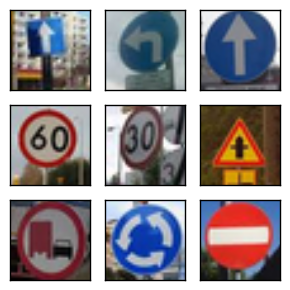

In [55]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import re

X_my = []
label_pattern = re.compile(r'\d+')
my_signs_dir = './resources/my-traffic-signs/'

for file in os.listdir(my_signs_dir):
    X_my.append(mpimg.imread(my_signs_dir+file))
    label = label_pattern.findall(file)[0]
    print("Loaded file: ", file)
    
visualize(X_my, grid_size=3, stride=1)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

Here are images I'm choosing together with justification why:
- label-35-contrast-non-existing-background.jpg because it's a real combo of:
  + high contrast
  + non-existing. It's not 'Ahead only' (id 35), it's a Polish sign of one-way road very similar to it regarding
    color and arrow shape. The only difference is a rectangular shape instead of circular.
  + there is a background clearly visible
- label-1-angle.jpg because it is taken from an angle and is really cluttered
- label-35.jpg because it is similar to first image but it actually is 'Ahead only'
- label-11-different-color.jpg because it's 'Right-of-way at the next intersection' sign (label 11) but a Polish
  version which has a yellow interior instead of white as in German version. By the way, I want here to defend my
  choose of converting images to grayscale. By doing that I think the model will classify images not so much 
  based on color. So the generalization should be better and it shouldn't matter so much what color is the
  interior of the sign. In real life the color also doesn't matter: there are no two signs of different meaning
  with the same infographic but just different color. Also LeCun paper mentioned in this lab text also says 
  that color doesn't matter much.
- label-3.jpg because I want to have one example of just a regular traffic-sign image

So the labels for above images are: 35 (that should be the best guess I think), 1, 35, 11, 3.

Lets prepare the data:

Loaded file:  label-35-contrast-non-existing-background.jpg
Loaded file:  label-1-angle.jpg
Loaded file:  label-35.jpg
Loaded file:  label-11-different-color.jpg
Loaded file:  label-3.jpg


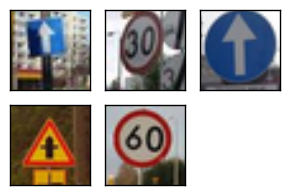

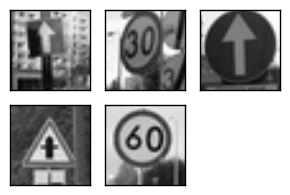

In [56]:
files = ['label-35-contrast-non-existing-background.jpg',\
         'label-1-angle.jpg',\
         'label-35.jpg',\
         'label-11-different-color.jpg',\
         'label-3.jpg']
y_my = [35,1,35,11,3]
X_my = []

for file in files:
    X_my.append(mpimg.imread(my_signs_dir+file))
    label = label_pattern.findall(file)[0]
    print("Loaded file: ", file)
    
visualize(X_my, grid_size=3, stride=1)

X_my = np.asarray(X_my)
y_my = np.asarray(y_my)

# restore the inner dimension so that each image is 32x32x1
new_X_my = np.zeros((X_my.shape[0], X_my.shape[1], X_my.shape[2], 1))
for i in range(X_my.shape[0]):
    gray = normalize(grayscale(X_my[i]))
    new_X_my[i] = np.reshape(gray,[X_my.shape[1], X_my.shape[2], 1]) 
X_my = new_X_my
del new_X_my
visualize(X_my, grid_size=3, stride=1, colormap="gray")

In [57]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    my_image_accuracy = sess.run(accuracy_operation, feed_dict={x: X_my, y: y_my, keep_prob:1.0})
    print("My image accuracy = {:.3f}".format(my_image_accuracy))

My image accuracy = 0.800


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

My model doesn't perform equally well as compared to the test set. It correctly categorized 4 out of 5 given images. But I have given it a really tricky traffic signs images.

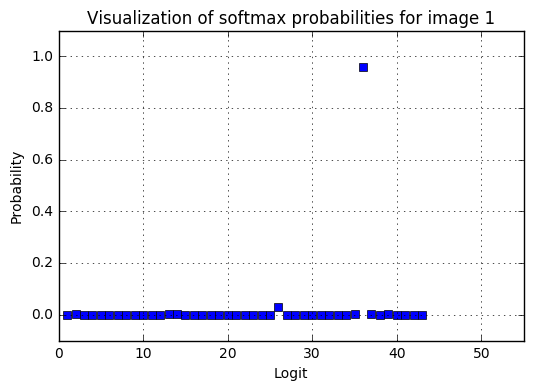

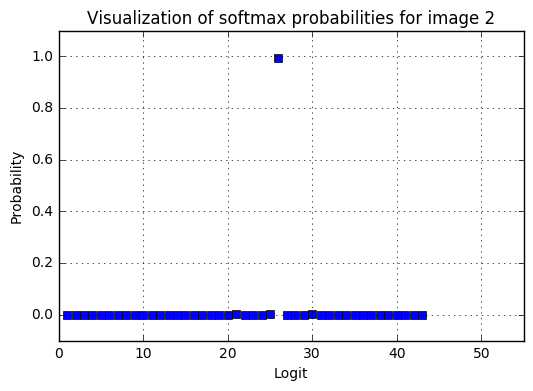

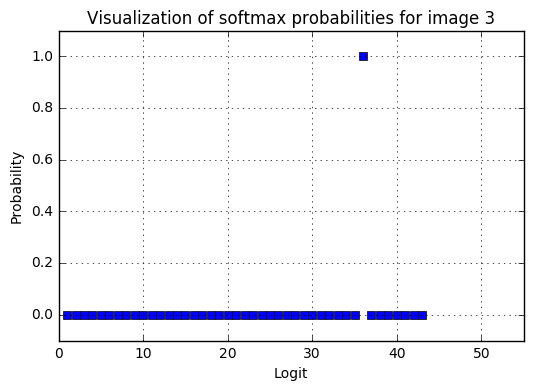

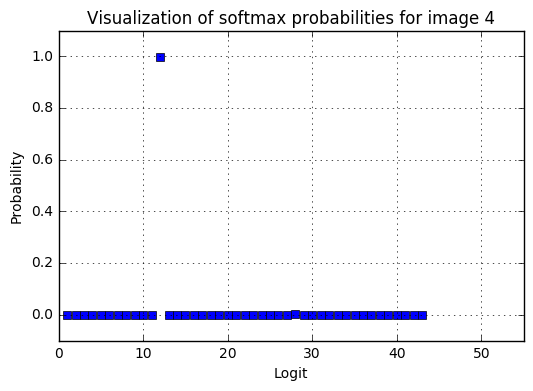

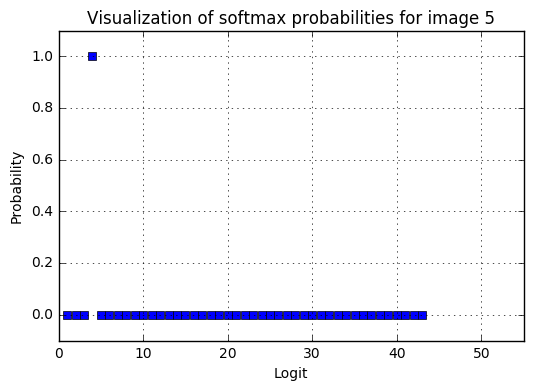

In [58]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt

softmax_probabilities = None
softmax = tf.nn.softmax(logits)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    softmax_probabilities = sess.run(softmax, feed_dict={x: X_my, keep_prob:1})
    
for i in range(softmax_probabilities.shape[0]):
    plt.plot(range(1,44), softmax_probabilities[i], 'bs')
    plt.xlabel('Logit')
    plt.ylabel('Probability')
    plt.title('Visualization of softmax probabilities for image '+str(i+1) )
    plt.axis([0, 55, -0.1, 1.1])
    plt.grid(True)
    plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [65]:
with tf.Session() as sess:
    top_5 = sess.run(tf.nn.top_k(tf.constant(softmax_probabilities), k=5))

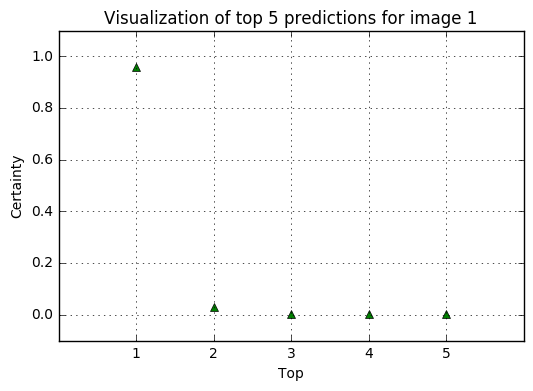

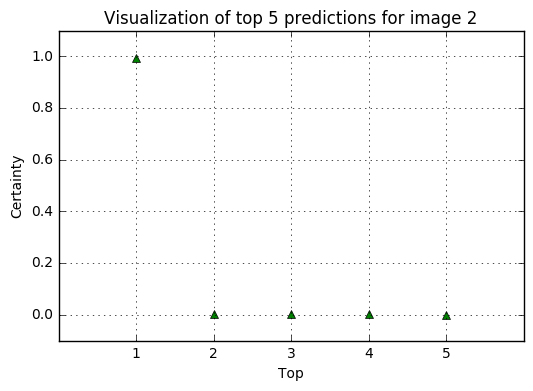

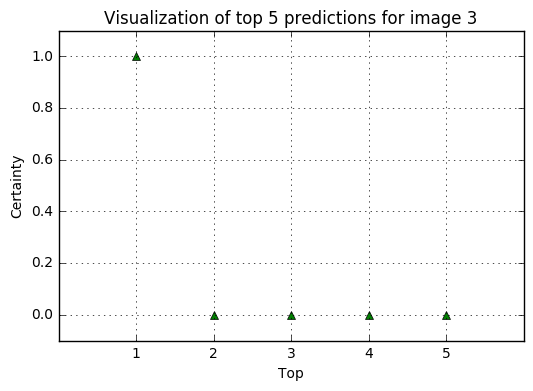

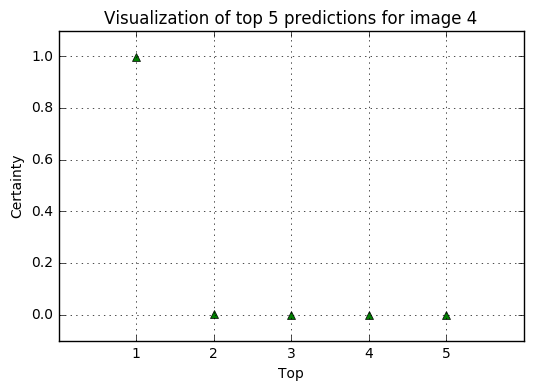

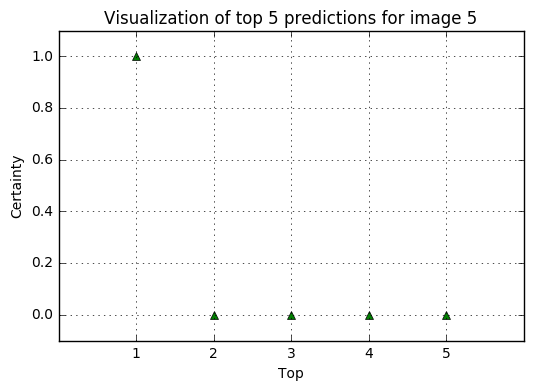

In [70]:
for i in range(len(top_5[0])):
    plt.plot(range(1,6), top_5[0][i], 'g^')
    plt.xlabel('Top')
    plt.ylabel('Certainty')
    plt.title('Visualization of top 5 predictions for image '+str(i+1) )
    plt.xticks([1,2,3,4,5])
    plt.axis([0, 6, -0.1, 1.1])
    plt.grid(True)
    plt.show()

In [71]:
print(top_5)

TopKV2(values=array([[  9.57111001e-01,   2.89026406e-02,   3.55361169e-03,
          3.36028822e-03,   2.52008764e-03],
       [  9.93271053e-01,   3.08089470e-03,   1.86100625e-03,
          6.76328840e-04,   5.10214828e-04],
       [  9.99983430e-01,   8.82991844e-06,   6.75734236e-06,
          4.41418905e-07,   2.01874386e-07],
       [  9.97894108e-01,   2.07614037e-03,   2.95029804e-05,
          2.01336391e-07,   3.65978536e-08],
       [  1.00000000e+00,   1.55838265e-09,   1.86046030e-13,
          1.75714315e-13,   5.39599756e-15]], dtype=float32), indices=array([[35, 25, 36, 12, 34],
       [25, 20, 29, 24,  1],
       [35, 37, 34,  1, 38],
       [11, 27, 28, 30, 24],
       [ 3,  5,  2,  9,  1]], dtype=int32))


**Answer:**

The model was very certain in all predictions. 

However the model was incorrect in its prediction of an image that is really cluttered and sign image is taken from angle: label-1-angle.jpg. The model really messed up here and the prediction of correct label is only 5th on it's top_5 predictions. So sign was categorized as a 'Road work' sign. And actually all top 4 predictions for this image falls into warning signs category that has a triangular shape. I suspect that the oval shape of the sign (because of the angle) was misinterpreted by the modeal as a triangle. That's my guess based on the probabilities.

It successfully categorized 'speed limit 60 sign' (label 3) and 'ahead only' sign (label 35) but they were easy ones.

What really shows that the CNN learned to generalize images I think is that:
- as I expected the non-existing 'One way road' sign was categorized as the most similar to it 'ahead only'
  (label 35) sign
- despite having different color of interior the sign 'Right-of-way at the next intersection' sign (label 11)
  was categorized properly.
  
I hope now my report will be accepted ;)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.